In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('/Users/gemma/Documents/data science/DS Bootcamp/epicurious-recipes-with-rating-and-nutrition/epi_r.csv')


In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

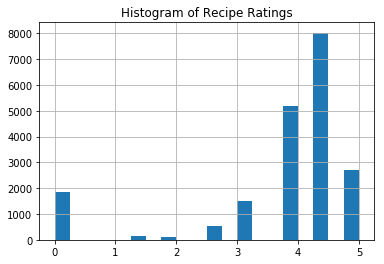

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()

In [8]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

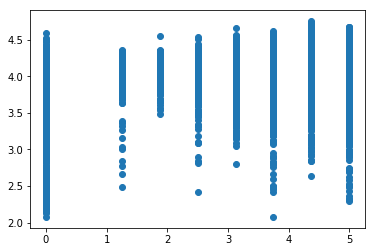

In [9]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [ ]:
svr.score(X, Y)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [12]:
# We could make it simpler still by instead of classifying on each possible value, 
# group reviews to some decided high and low values.

raw_data['score'] = np.where(raw_data['rating'] >3, 'high', 'low')

# i didnt think that through and realize i need a binary indicator
raw_data['high_score'] = np.where(raw_data['score'] == 'high', 1, 0)

In [13]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,score,high_score
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,low,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high,1
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high,1


In [14]:
raw_data.dropna(how='any', inplace=True)

In [15]:
raw_data.columns.values

array(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       '#cakeweek', '#wasteless', '22-minute meals',
       '3-ingredient recipes', '30 days of groceries',
       'advance prep required', 'alabama', 'alaska', 'alcoholic',
       'almond', 'amaretto', 'anchovy', 'anise', 'anniversary',
       'anthony bourdain', 'aperitif', 'appetizer', 'apple',
       'apple juice', 'apricot', 'arizona', 'artichoke', 'arugula',
       'asian pear', 'asparagus', 'aspen', 'atlanta', 'australia',
       'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake',
       'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean',
       'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer',
       'beet', 'bell pepper', 'berry', 'beverly hills', 'birthday',
       'biscuit', 'bitters', 'blackberry', 'blender', 'blue cheese',
       'blueberry', 'boil', 'bok choy', 'bon appétit', 'bon app��tit',
       'boston', 'bourbon', 'braise', 'bran', 'brandy', 'bread',
       'breadcrumbs', 

## Feature selection w/ K best

Using Select K Best to select the features with the k best ANOVA F-values

(I selected 40 because we were asked to narrow down to 30. After the initial 40 are selected, I'll narrow it down to 30.)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with k best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=40)

features = raw_data.drop(['title','rating','score', 'high_score'],1)

coltitles = features.columns.values

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(features, raw_data['score'])

print('Original number of features:', features.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


Original number of features: 678
Reduced number of features: 40


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 97 199 225 229 247 292 298 323 385 401 528 647] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [17]:
idxs_selected = fvalue_selector.get_support(indices=True)

print(idxs_selected)


[ 12  36  54  61  67 114 123 137 138 147 164 190 208 221 233 239 244 266
 281 335 337 411 426 446 457 469 502 506 524 530 548 578 584 615 625 628
 638 643 655 665]


In [18]:
features_dataframe_new = features.loc[:,coltitles[idxs_selected]]

In [19]:
features_dataframe_new.head()

,alcoholic,bake,bitters,bon appétit,brandy,chartreuse,chile pepper,cocktail,cocktail party,condiment,...,sauté,soy free,spirit,tea,tomato,tree nut free,vegan,vermouth,weelicious,winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
features_dataframe_new.head()

,alcoholic,bake,bitters,bon appétit,brandy,chartreuse,chile pepper,cocktail,cocktail party,condiment,...,sauté,soy free,spirit,tea,tomato,tree nut free,vegan,vermouth,weelicious,winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = features_dataframe_new

#.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.high_score
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

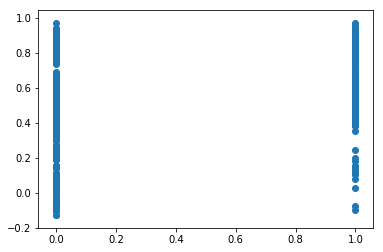

In [22]:
plt.scatter(Y, svr.predict(X))

In [23]:
svr.score(X, Y)

0.0914364277193407

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.07076283, 0.0763231 , 0.08346713, 0.09778402, 0.07788822])

## Feature selection with PCA 


In [25]:
from sklearn.feature_selection import chi2

X2 = raw_data.drop(['title','rating','score', 'high_score'],1)
Y = raw_data.high_score

# feature extraction
test = SelectKBest(score_func=chi2, k=40)
fit = test.fit(X2, Y)
# summarize scores
np.set_printoptions(precision=5)
#print(fit.scores_)
features = fit.transform(X2)
# summarize selected features
#print(features[0:5,:])

idxs2_selected = test.get_support(indices=True)

cols = X2.columns.values

features_pca = raw_data.loc[:,cols[idxs2_selected]]

In [26]:
features_pca.head()

,calories,protein,fat,sodium,alcoholic,bake,bitters,bon appétit,brandy,chartreuse,...,roast,rum,sauté,spirit,tea,tomato,vegan,vermouth,weelicious,winter
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,403.0,18.0,23.0,1439.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,547.0,20.0,32.0,452.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
X3 = features_pca 
Y3 = raw_data.high_score
svr.fit(X3,Y3)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
svr.score(X3, Y3)

0.8001022022719663

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X3, Y3, cv=5)

array([0.04496, 0.04359, 0.04541, 0.05529, 0.06319])

In [30]:
features_pca.columns.values

array(['calories', 'protein', 'fat', 'sodium', 'alcoholic', 'bake',
       'bitters', 'bon appétit', 'brandy', 'chartreuse', 'chile pepper',
       'cocktail', 'cocktail party', 'condiment', 'créme de cacao',
       'drink', 'fall', 'fortified wine', 'fruit juice', 'gin',
       'harpercollins', 'house & garden', 'lime juice', 'liqueur',
       'non-alcoholic', 'onion', 'party', 'pickles', 'punch',
       'quick & easy', 'roast', 'rum', 'sauté', 'spirit', 'tea', 'tomato',
       'vegan', 'vermouth', 'weelicious', 'winter'], dtype=object)

In [32]:
pca2 = features_pca.drop(['brandy','cocktail party','non-alcoholic', 'spirit', 'vermouth',
                   'weelicious','drink', 'rum','gin','liqueur' ],1)

X4 = pca2
Y3 = raw_data.high_score
svr.fit(X4,Y3)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
svr.score(X4, Y3)

0.8200918463903808

In [34]:
cross_val_score(svr, X4, Y3, cv=5)

array([0.05733, 0.04903, 0.05281, 0.06586, 0.07381])

## Features preselected, using Random Forest classifier

In [35]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
X = pca2
Y = raw_data.high_score
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.89414, 0.8954 , 0.89414, 0.89729, 0.90233, 0.8966 , 0.89975,
       0.88966, 0.90227, 0.89211])

## SVM using features selected above

In [36]:
svr.score(X, Y)


0.8200918463903808

In [37]:
cross_val_score(svr, X, Y, cv=5)


array([0.05733, 0.04903, 0.05281, 0.06586, 0.07381])

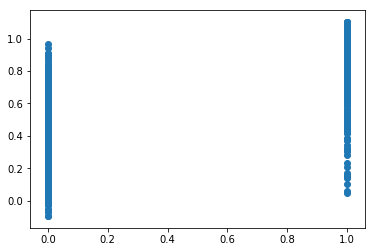

In [38]:
plt.scatter(Y, svr.predict(X))